In [6]:
pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt 

In [24]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
n = 1000
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)}

df = pd.DataFrame(data)
print(df.head())

        Date Category  Likes
0 2021-01-01  Fitness   1775
1 2021-01-02   Health   6188
2 2021-01-03     Food   7888
3 2021-01-04     Food   5388
4 2021-01-05     Food   2147


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 19.7+ KB


In [26]:
df.describe()

,Date,Likes
count,1000,1000.000000
mean,2022-05-15 12:00:00,4877.127000
min,2021-01-01 00:00:00,8.000000
25%,2021-09-07 18:00:00,2362.750000
50%,2022-05-15 12:00:00,4661.000000
75%,2023-01-20 06:00:00,7317.500000
max,2023-09-27 00:00:00,9998.000000
std,NaN,2879.817744


In [27]:
df['Category'].value_counts()

Category
Music      138
Food       133
Fashion    130
Travel     127
Fitness    123
Health     119
Culture    118
Family     112
Name: count, dtype: int64

In [28]:
df = df.dropna()
df = df.drop_duplicates()
df['Date'] = pd.to_datetime(df['Date'])
df['Likes'] = df['Likes'].astype(int)

In [29]:
df.info()
df.describe()
df['Category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Category  1000 non-null   object        
 2   Likes     1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 19.7+ KB


Category
Music      138
Food       133
Fashion    130
Travel     127
Fitness    123
Health     119
Culture    118
Family     112
Name: count, dtype: int64

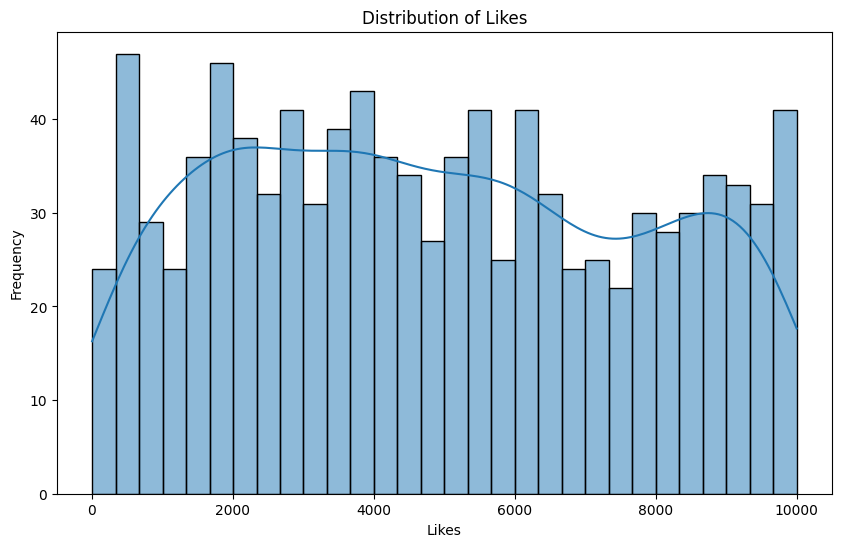

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()


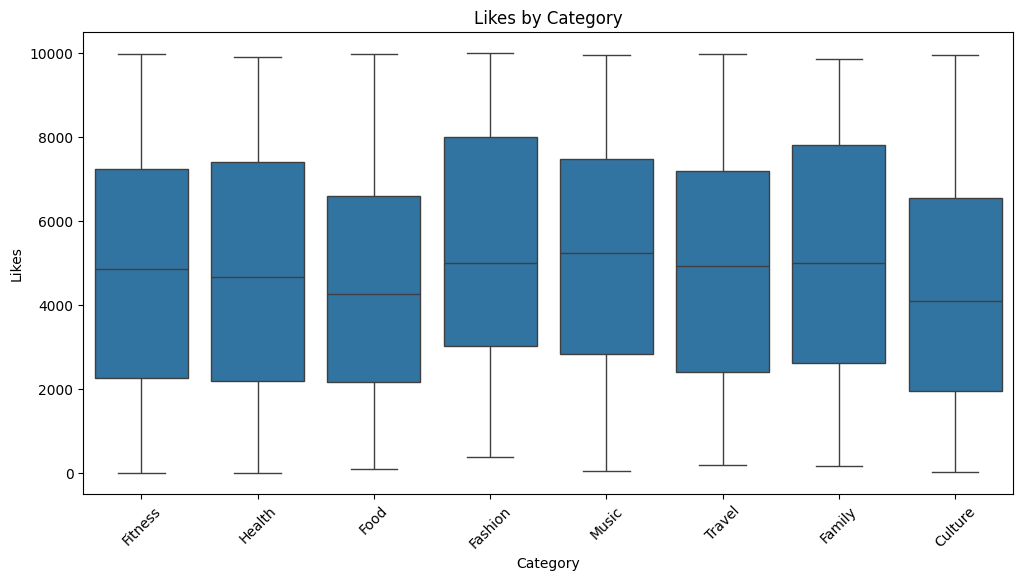

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()


In [32]:
mean_likes = df['Likes'].mean()
print(mean_likes)

4877.127


In [33]:
mean_likes_by_category = df.groupby('Category')['Likes'].mean()
print(mean_likes_by_category)

Category
Culture    4428.974576
Family     5039.598214
Fashion    5385.553846
Fitness    4778.804878
Food       4581.541353
Health     4813.092437
Music      5126.072464
Travel     4824.070866
Name: Likes, dtype: float64
